##### Implement multi-layer fully connnected neural net

The underlying model is based on assignment 2 from Stanford's CS231n course.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os
import skimage.io as io
from skimage.transform import resize
sys.path.append('../')
from helpers.cs231n.classifiers.fc_net import *
from cs231n.solver import Solver

#import nn.neural_net as NN
import helpers.histogram_classifier as hc
import time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from IPython.core.display import HTML
css = open('styles/table-style.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [24]:
SIZE = 64

In [25]:
classes = pd.read_csv('../data/food-101/meta/top_classes.csv', index_col=0)
class_list = list(classes['class'].unique())

image_names = {}
for c in class_list:
    image_names[c] = np.array(classes[classes['class'] == c]['name'])

In [26]:
train, test = hc.split_data(image_names, 0.85)

In [27]:
X = []
y = []
X_test = []
y_test = []

for i, c in enumerate(class_list):
    for im in train[c]:
        img = io.imread(os.path.join("../data/food-101/top_classes/", c, "", im))
        img = resize(img, (SIZE, SIZE, SIZE, 3))
        X.append(img)
        y.append(i)
    for im in test[c]:
        img = io.imread(os.path.join("../data/food-101/top_classes/", c, "", im))
        img = resize(img, (SIZE, SIZE, SIZE, 3))
        X_test.append(img)
        y_test.append(i)

X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [28]:
print("X has shape: {}".format(X.shape))
print("y has shape: {}".format(y.shape))
print("X_test has shape: {}".format(X_test.shape))
print("y_test has shape: {}".format(y_test.shape))

X has shape: (10200, 64, 64, 3)
y has shape: (10200,)
X_test has shape: (1800, 64, 64, 3)
y_test has shape: (1800,)


In [29]:
# Get subset of X_train for validation
train_per_class = int(np.floor(0.85 * 1000))
train_subset = int(np.floor(0.85 * train_per_class))

all_indices = np.arange(X.shape[0])
train_indices = []
test_indices = []

for i, c in enumerate(class_list):
    train_indices.append(all_indices[i * train_per_class:(i * train_per_class) + train_subset])
    test_indices.append(all_indices[(i * train_per_class) + train_subset:(i + 1) * train_per_class])
train_indices = np.array(train_indices)
train_indices = train_indices.reshape((train_indices.shape[0] * train_indices.shape[1],))
test_indices = np.array(test_indices)
test_indices = test_indices.reshape((test_indices.shape[0] * test_indices.shape[1],))

In [30]:
%%time
X_train = X[train_indices]
y_train = y[train_indices]
X_val = X[test_indices]
y_val = y[test_indices]

CPU times: user 377 ms, sys: 327 ms, total: 705 ms
Wall time: 735 ms


In [31]:
print("X_train has shape: {}".format(X_train.shape))
print("y_train has shape: {}".format(y_train.shape))
print("X_val has shape: {}".format(X_val.shape))
print("y_val has shape: {}".format(y_val.shape))

X_train has shape: (8664, 64, 64, 3)
y_train has shape: (8664,)
X_val has shape: (1536, 64, 64, 3)
y_val has shape: (1536,)


In [32]:
# Reshape the X data
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print("X_train has shape: {}".format(X_train.shape))
print("X_test has shape: {}".format(X_test.shape))
print("X_val has shape: {}".format(X_val.shape))

X_train has shape: (8664, 12288)
X_test has shape: (1800, 12288)
X_val has shape: (1536, 12288)


In [33]:
# Subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_test -= mean_image
X_val -= mean_image

In [36]:
FullyConnectedNet?

In [39]:
# Double check that loss is reasonable
model = FullyConnectedNet([100, 100, 100, 100, 100], input_dim=64*64*3, num_classes=12, weight_scale=5e-2)
loss, grad = model.loss(X_val, y_val)
print(loss)

2.48475154241


In [40]:
-np.log(1/12)

2.4849066497880004

In [41]:
# Increase regularization and see if loss goes up
model = FullyConnectedNet([100, 100, 100, 100, 100], input_dim=64*64*3, num_classes=12, weight_scale=5e-2, reg=1e3)
loss, grad = model.loss(X_val, y_val)
print(loss)

1588140.44879


(Iteration 1 / 40) loss: 2.484908
(Epoch 0 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 1 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 2 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 3 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 4 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 5 / 20) train acc: 1.000000; val_acc: 0.083333
(Iteration 11 / 40) loss: 2.475701
(Epoch 6 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 7 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 8 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 9 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 10 / 20) train acc: 1.000000; val_acc: 0.083333
(Iteration 21 / 40) loss: 2.466510
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.083333
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.083333
(Iteration 31 / 40) loss: 

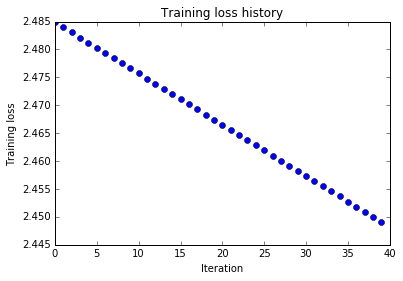

In [44]:
# Try and overfit very small portion of data
num_train = 50
small_data = {
  'X_train': X_train[:num_train],
  'y_train': y_train[:num_train],
  'X_val': X_val,
  'y_val': y_val,
}
weight_scale = np.sqrt(2 / (64*64*3 + 12))
learning_rate = 1e-3
model = FullyConnectedNet([100, 100, 100, 100, 100], input_dim=64*64*3, num_classes=12, weight_scale=weight_scale, reg=0)

solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

In [145]:
data = {
  'X_train': X_train,
  'y_train': y_train,
  'X_val': X_val,
  'y_val': y_val,
}
weight_scale = np.sqrt(2 / (64*64*3 + 12))
num_epochs=10
update_rule = 'sgd_momentum'

best_score = -1
best_params = (0, 0)
best_model = None

for i in range(100):

    learning_rate = 10 ** np.random.uniform(-7, -3)
    reg = 10 ** np.random.uniform(-5, 1)

    model = FullyConnectedNet([110, 110, 110, 110], input_dim=64*64*3, num_classes=12, weight_scale=weight_scale, reg=reg)

    solver = Solver(model, data,
                    print_every=20, num_epochs=num_epochs, batch_size=200,
                    update_rule=update_rule,
                    optim_config={
                      'learning_rate': learning_rate,
                    }, verbose=False
             )
    solver.train()
    predictions = np.argmax(model.loss(X_test), axis=1)
    val_acc = (predictions == y_test).mean()
    if val_acc > best_score:
        best_score = val_acc
        best_params = (learning_rate, reg)
        best_model = model
    print("Val acc: {}, lr: {}, reg: {}".format(val_acc, learning_rate, reg))

#plt.plot(solver.loss_history, 'o')
#plt.title('Training loss history')
#plt.xlabel('Iteration')
#plt.ylabel('Training loss')
#plt.show()

#plt.plot(solver.train_acc_history, color='r')
#plt.plot(solver.val_acc_history, color='b')
#plt.title('Training vs. Val Acc History')
#plt.show()

Val acc: 0.09555555555555556, lr: 0.000602921201656911, reg: 0.0010063435272573678
Val acc: 0.08222222222222222, lr: 1.3155485162622495e-05, reg: 7.554651446853547e-05
Val acc: 0.08222222222222222, lr: 6.423719130763543e-06, reg: 0.037991237884934796
Val acc: 0.0961111111111111, lr: 6.266353761302217e-07, reg: 2.1539050143444977e-05
Val acc: 0.06888888888888889, lr: 7.981755760443523e-06, reg: 0.12357445333182487
Val acc: 0.06777777777777778, lr: 2.367969458129525e-06, reg: 2.405411840770378
Val acc: 0.09166666666666666, lr: 1.2350400167787523e-06, reg: 0.0041701852272680836
Val acc: 0.09722222222222222, lr: 0.000119960947801173, reg: 4.135054642203846e-05
Val acc: 0.08833333333333333, lr: 7.424146647039616e-05, reg: 0.7711385027135578
Val acc: 0.09333333333333334, lr: 3.568908708690723e-05, reg: 0.162599813660085
Val acc: 0.0811111111111111, lr: 1.3846381851993583e-06, reg: 3.801296493715753e-05
Val acc: 0.07944444444444444, lr: 4.083237113216134e-07, reg: 0.02910259263936648
Val acc:

In [146]:
best_score

0.10388888888888889

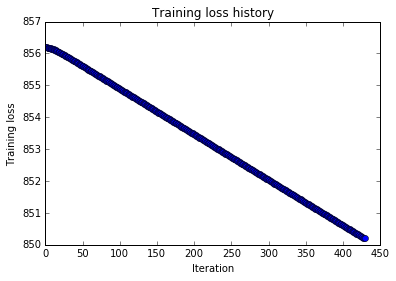

In [153]:
plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

In [154]:
data = {
  'X_train': X_train,
  'y_train': y_train,
  'X_val': X_val,
  'y_val': y_val,
}
weight_scale = np.sqrt(2 / (64*64*3 + 12))
num_epochs = 40
update_rule = 'sgd_momentum'

learning_rate = best_params[0]
reg = best_params[1]

model = FullyConnectedNet([110, 110, 110, 110], input_dim=64*64*3, num_classes=12, weight_scale=weight_scale, reg=reg)

solver = Solver(model, data,
                    print_every=20, num_epochs=num_epochs, batch_size=200,
                    update_rule=update_rule,
                    optim_config={
                      'learning_rate': learning_rate,
                    }, verbose=False
             )
solver.train()

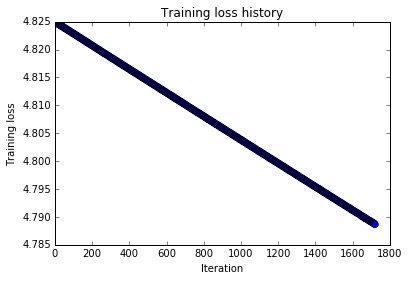

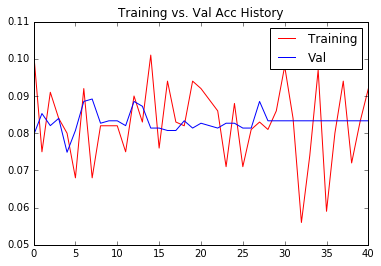

In [157]:
plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

plt.plot(solver.train_acc_history, color='r', label='Training')
plt.plot(solver.val_acc_history, color='b', label='Val')
plt.title('Training vs. Val Acc History')
plt.legend()
plt.show()

In [162]:
predictions = np.argmax(model.loss(X_test), axis=1)

In [163]:
def map_labels(x):
    return class_list[x]

f = np.vectorize(map_labels)

In [164]:
overall, metrics, confusion = hc.get_metrics(f(y_test), f(predictions), class_list)

/Users/simonbedford/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/simonbedford/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/simonbedford/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [165]:
overall

,Accuracy,F1,Precision,Recall
Results,0.087,0.023,0.015,0.087


In [166]:
metrics

,Precision,Recall,F1-Score,Support
pork_chop,0.00,0.00,0.00,150.0
lasagna,0.09,0.88,0.16,150.0
french_toast,0.00,0.00,0.00,150.0
guacamole,0.00,0.00,0.00,150.0
apple_pie,0.00,0.00,0.00,150.0
cheesecake,0.00,0.00,0.00,150.0
hamburger,0.00,0.00,0.00,150.0
fried_rice,0.00,0.00,0.00,150.0
carrot_cake,0.00,0.00,0.00,150.0
chocolate_cake,0.10,0.17,0.12,150.0


In [167]:
confusion

,pork_chop,lasagna,french_toast,guacamole,apple_pie,cheesecake,hamburger,fried_rice,carrot_cake,chocolate_cake,steak,pizza
pork_chop,0,130,0,0,0,0,0,0,0,20,0,0
lasagna,0,132,0,0,0,0,0,0,0,18,0,0
french_toast,0,126,0,0,0,0,0,0,0,24,0,0
guacamole,0,118,0,0,0,0,0,0,0,32,0,0
apple_pie,0,136,0,0,0,0,0,0,0,14,0,0
cheesecake,0,134,0,0,0,0,0,0,0,16,0,0
hamburger,0,125,0,0,0,0,0,0,0,25,0,0
fried_rice,0,131,0,0,0,0,0,0,0,19,0,0
carrot_cake,0,128,0,0,0,0,0,0,0,22,0,0
chocolate_cake,0,125,0,0,0,0,0,0,0,25,0,0
